<br>

# Introdução

In [24]:
import os
import time
import ctypes
import datetime
import numpy as np
import pandas as pd
import dask.dataframe as dd
import pyarrow.parquet as pq

<br>

# Gráfico

In [25]:
# Parameters
pto_mon = 'ABAN02800'
parametro = 'Oxigênio Dissolvido'

# Paths
input_path = os.path.join('..', 'data', 'amostras')
filter_path = os.path.join(
    input_path,
    'cod_ponto={}'.format(pto_mon),
    'parametro={}'.format(parametro),
    '*.parquet'
)

In [26]:
# Set Filters
filters = [
    ('cod_ponto', '==', pto_mon),
    ('parametro', '==', parametro),
]

# Read Dataframes
df = dd.read_parquet(
    os.path.join(filter_path),
    #filters=filters,
)

# Calculate
df = df.compute()
df['valor'] = pd.to_numeric(df['valor'].str.replace(',', '.'), errors='ignore')
df = df[['cod_ponto', 'datahora_coleta', 'parametro', 'sinal', 'valor', 'unidade']].copy()
df.reset_index(inplace=True, drop=True)
df.sort_values(by=['datahora_coleta'], ascending=True, inplace=True)

# Results
print(len(df))
print(df.dtypes)
df.head()

23
cod_ponto                category
datahora_coleta    datetime64[ns]
parametro                category
sinal                      object
valor                     float64
unidade                    object
dtype: object


,cod_ponto,datahora_coleta,parametro,sinal,valor,unidade
0,ABAN02800,2017-01-17 09:50:00,Oxigênio Dissolvido,None,3.53,mg/L
1,ABAN02800,2017-03-16 10:24:00,Oxigênio Dissolvido,None,3.52,mg/L
2,ABAN02800,2017-05-04 09:58:00,Oxigênio Dissolvido,None,3.65,mg/L
3,ABAN02800,2017-07-19 10:30:00,Oxigênio Dissolvido,None,5.48,mg/L
4,ABAN02800,2017-09-20 09:39:00,Oxigênio Dissolvido,None,4.50,mg/L


<AxesSubplot:xlabel='datahora_coleta', ylabel='valor'>

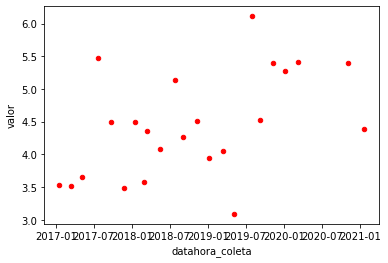

In [27]:
df.plot(kind='scatter', x='datahora_coleta', y='valor', color='red')

<br>

# Export

In [28]:
# Parameters
pto_mon = 'ABAN02800'
parametro = ''

# Paths
input_path = os.path.join('..', 'data', 'amostras')
filter_path = os.path.join(
    input_path,
    'cod_ponto={}'.format(pto_mon),
    'parametro={}'.format('*' if parametro == '' else parametro),
    '*.parquet'
)
filter_path

'../data/amostras/cod_ponto=ABAN02800/parametro=*/*.parquet'

In [29]:
# Set Filters
filters = [
    ('cod_ponto', '==', pto_mon),
    #('parametro', '==', parametro),
]

# Read Dataframes
df = dd.read_parquet(
    os.path.join(filter_path),
    filters=filters,
)

# Calculate
df = df.compute()
#df['valor'] = pd.to_numeric(df['valor'].str.replace(',', '.'), errors='ignore')
df = df[['cod_ponto', 'datahora_coleta', 'parametro', 'sinal', 'valor', 'unidade']].copy()
df.reset_index(inplace=True, drop=True)
df.sort_values(by=['datahora_coleta'], ascending=True, inplace=True)

# Results
print(len(df))
print(df.dtypes)
df.head()

977
cod_ponto                category
datahora_coleta    datetime64[ns]
parametro                category
sinal                      object
valor                      object
unidade                    object
dtype: object


,cod_ponto,datahora_coleta,parametro,sinal,valor,unidade
0,ABAN02800,2017-01-17 09:50:00,Alumínio Dissolvido,<,0.10000000,mg/L
799,ABAN02800,2017-01-17 09:50:00,Sódio,None,4.72000000,mg/L
287,ABAN02800,2017-01-17 09:50:00,Cádmio Total,<,0.00070000,mg/L
267,ABAN02800,2017-01-17 09:50:00,Crômio Total,<,0.02000000,mg/L
819,ABAN02800,2017-01-17 09:50:00,Sólido Dissolvido Total,<,100.00000000,mg/L


In [30]:
# Write to Excel
output_path = os.path.join('..', 'data', 'output')
os.makedirs(output_path, exist_ok=True)

df.to_excel(
    os.path.join(output_path, '{}.xlsx'.format(pto_mon)),
    index=False,
)

In [31]:
df.dtypes

cod_ponto                category
datahora_coleta    datetime64[ns]
parametro                category
sinal                      object
valor                      object
unidade                    object
dtype: object